In [1]:
import process_db
import h5py
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
import random
random.seed(1)

rna_embeddings = np.loadtxt('./output/exprs_10xPBMC_rna_embeddings.txt')
atac_embeddings = np.loadtxt('./output/exprs_10xPBMC_atac_embeddings.txt')
print(rna_embeddings.shape)
print(atac_embeddings.shape)
embeddings =  np.concatenate((rna_embeddings, atac_embeddings))
print(embeddings.shape)
embeddings=np.nan_to_num(embeddings)
tsne_results = TSNE(perplexity=30, n_iter = 1000).fit_transform(embeddings)
tsne_results.shape
df = pd.DataFrame()
df['tSNE1'] = tsne_results[:,0]
df['tSNE2'] = tsne_results[:,1]
print("done")


(9841, 64)
(6913, 64)
(16754, 64)


/home/jo10595/conda/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/jo10595/conda/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


done


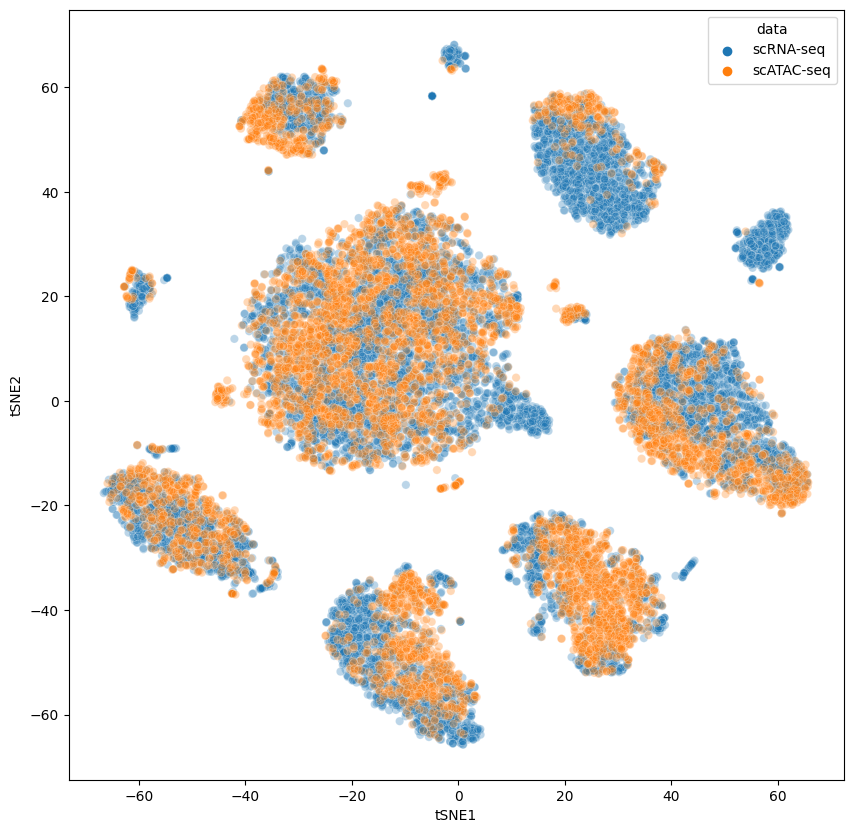

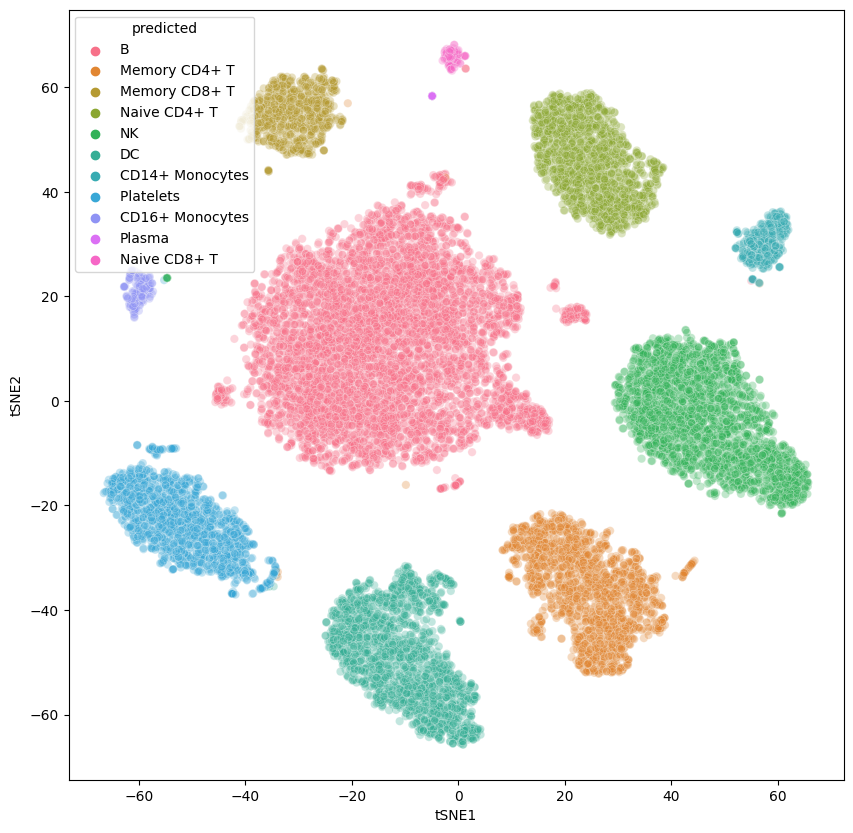

In [3]:
#print(df)
rna_labels = np.loadtxt('./data/cellType_10xPBMC_rna.txt')
atac_predictions = np.loadtxt('./output/exprs_10xPBMC_atac_knn_predictions.txt')
labels =  np.concatenate((rna_labels, atac_predictions))
#print(df.shape)
#print(len(rna_labels))
#print(len(atac_predictions))
#print(len(labels))
label_to_idx = pd.read_csv('./label_to_idx.txt', sep = '\t', header = None)
label_to_idx.shape
label_dic = []
for i in range(label_to_idx.shape[0]):
    label_dic = np.append(label_dic, label_to_idx[0][i][:-2])

#print(label_dic)
#print(len(label_dic))
#print(labels)
#print(label_dic[labels.astype(int)[39]])

#print(labels)
#print(len(labels))
#print(label_dic[labels.astype(int)])
#print(len(label_dic[labels.astype(int)]))
#for x in labels.astype(int):
#    print(x)
#    print(label_dic[x])

data_label = np.array(["scRNA-seq", "scATAC-seq"])
df['data'] = np.repeat(data_label, [rna_embeddings.shape[0], atac_embeddings.shape[0]], axis=0)
#print(len(labels.astype(int)))
#print(df['data'])
#print(label_dic[labels.astype(int)])
#print(len(df['data']))
#print(label_dic)
#for item in labels:
#    print(item)
#    print(label_dic[item.astype(int)])
#print(labels[1])
#print(label_dic[labels[1].astype(int)])
df['predicted'] = label_dic[labels.astype(int)-1]



plt.figure(figsize=(10,10))
sns.scatterplot(
    x = "tSNE1", y = "tSNE2",
    hue = "data",
    palette = sns.color_palette("tab10", 2),
    data = df,
    legend = "full",
    alpha = 0.3
)
plt.savefig("sc_data_switched_skip_referenced_random_new_corrected_1.png")

plt.figure(figsize=(10,10))
sns.scatterplot(
    x = "tSNE1", y = "tSNE2",
    hue = "predicted",
    data = df,
    legend = "full",
    alpha = 0.3
)
plt.savefig("sc_predicted_switched_skip_referenced_new_corrected_1.png")

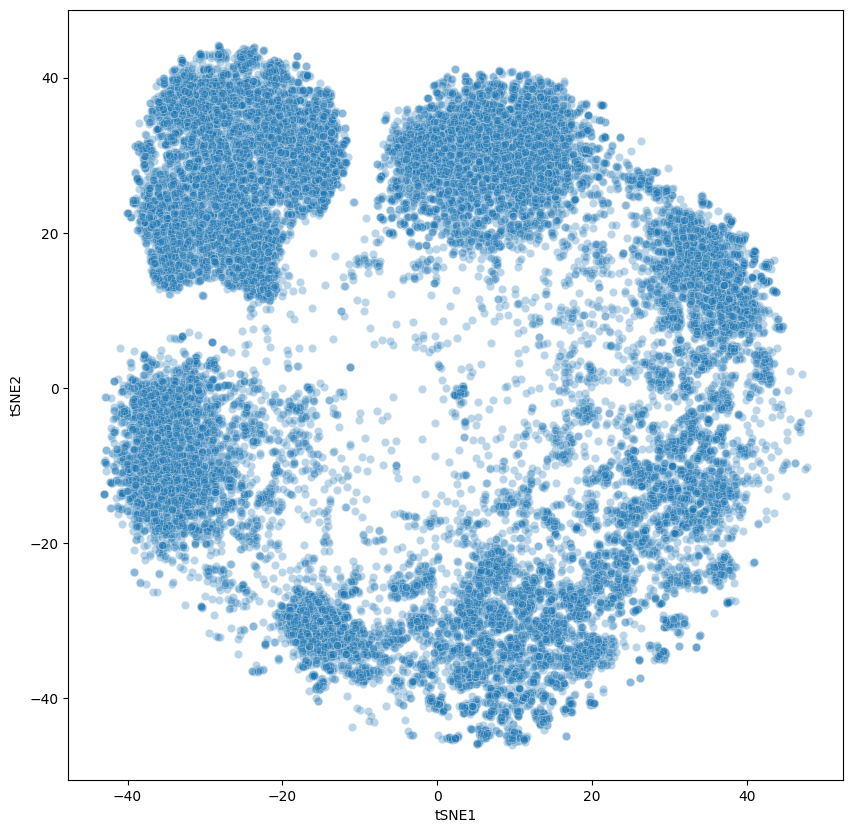

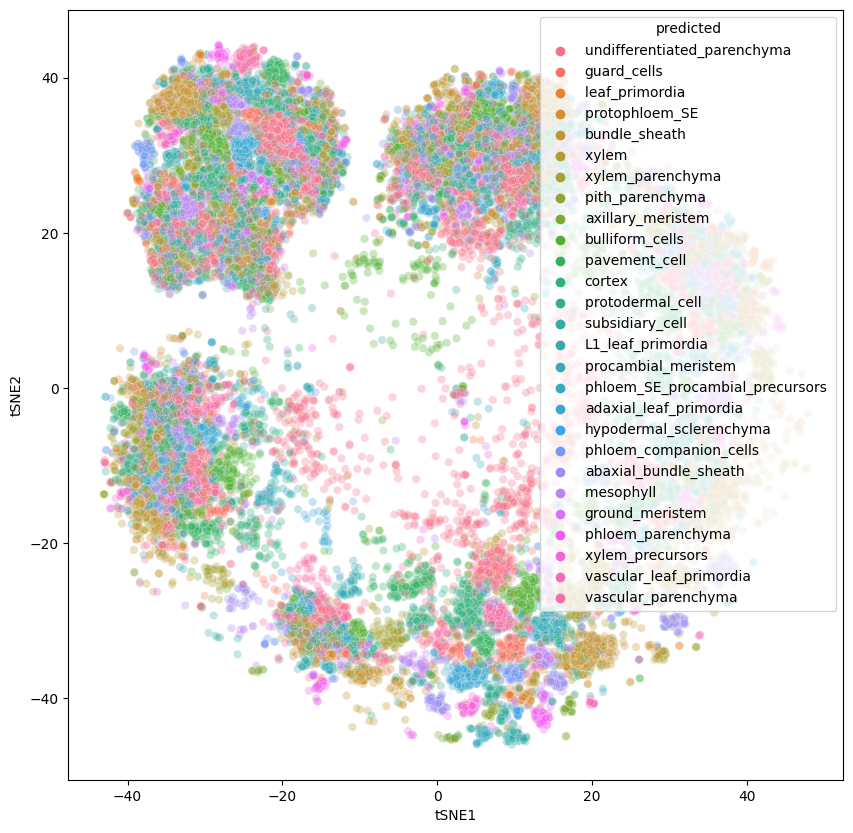

In [3]:
df_modi = df[df.data == "scRNA-seq"]

#df_modi = df_modi[df_modi.tSNE2 > -10]

plt.figure(figsize=(10,10))
sns.scatterplot(
    x = "tSNE1", y = "tSNE2",
    #hue = "data",
    palette = sns.color_palette("tab10", 2),
    data = df_modi,
    legend = "full",
    alpha = 0.3
)
plt.savefig("sc_data_switched_new_random2.png")

plt.figure(figsize=(10,10))
sns.scatterplot(
    x = "tSNE1", y = "tSNE2",
    hue = "predicted",
    data = df_modi,
    legend = "full",
    alpha = 0.3
)
plt.savefig("sc_predicted_switched_new_random2.png")

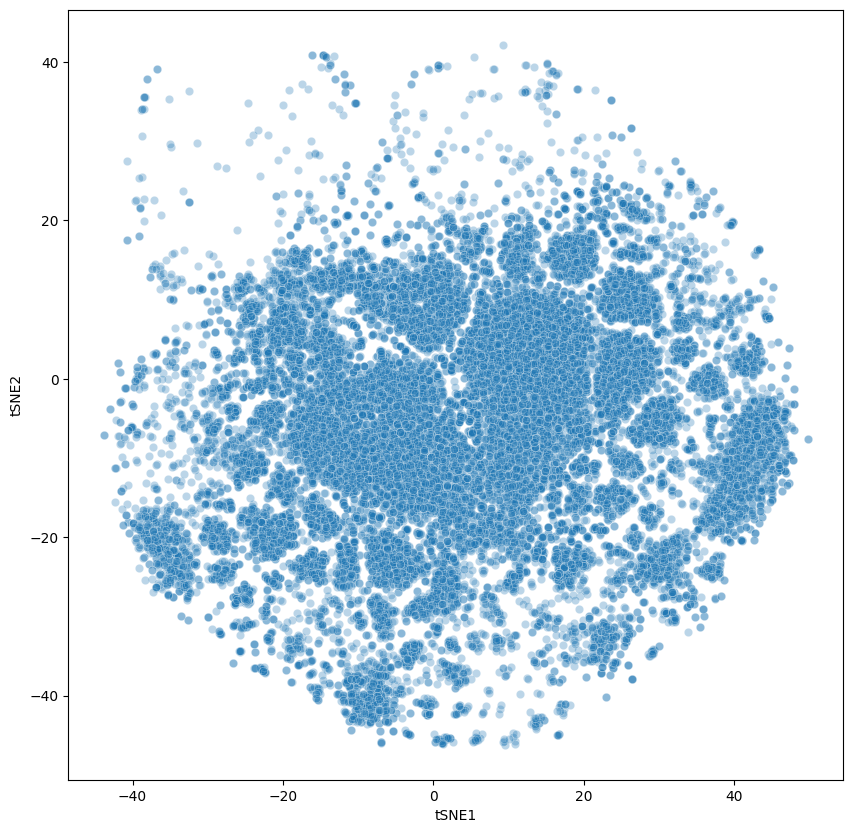

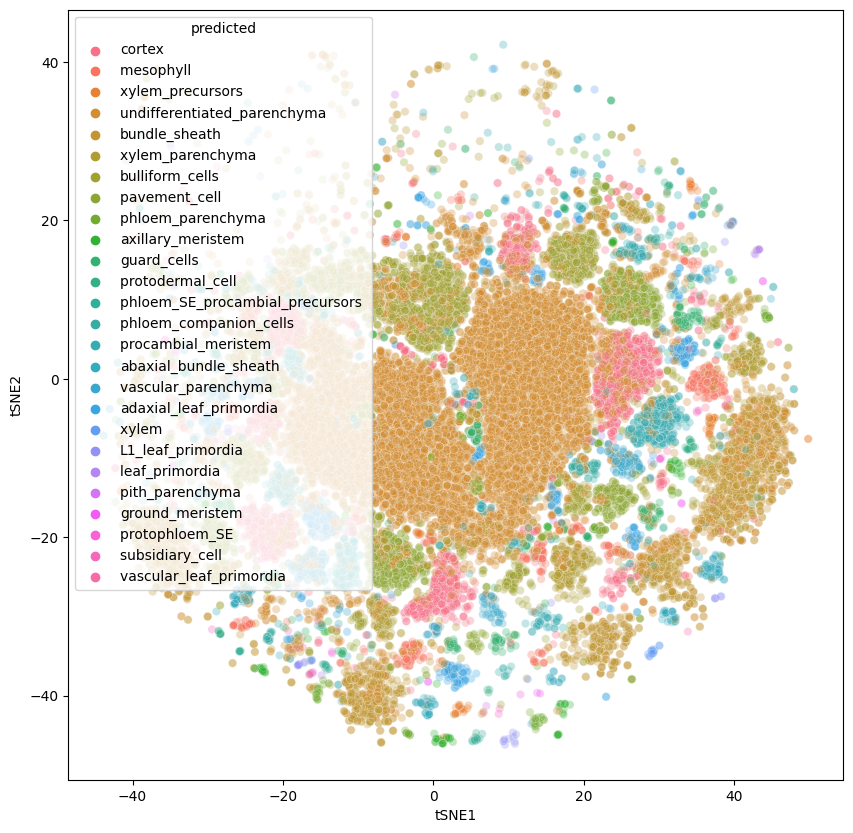

In [4]:
df_modi = df[df.data == "scATAC-seq"]

#df_modi = df_modi[df_modi.tSNE2 > -10]

plt.figure(figsize=(10,10))
sns.scatterplot(
    x = "tSNE1", y = "tSNE2",
    #hue = "data",
    palette = sns.color_palette("tab10", 2),
    data = df_modi,
    legend = "full",
    alpha = 0.3
)
plt.savefig("sc_data_switched_new_random2.png")

plt.figure(figsize=(10,10))
sns.scatterplot(
    x = "tSNE1", y = "tSNE2",
    hue = "predicted",
    data = df_modi,
    legend = "full",
    alpha = 0.3
)
plt.savefig("sc_predicted_switched_new_random2.png")

In [6]:
print(df[df.data=="scATAC-seq"])
#list=df.predicted.tolist()

           tSNE1      tSNE2        data                     predicted
30305   9.200102  15.715835  scATAC-seq                        cortex
30306  -4.234737 -35.801041  scATAC-seq                    mesophyll 
30307  14.473573 -24.382698  scATAC-seq                    mesophyll 
30308 -16.123146  40.822361  scATAC-seq             xylem_precursors 
30309  -9.638653  -9.315763  scATAC-seq  undifferentiated_parenchyma 
...          ...        ...         ...                           ...
60602  24.283463 -10.435438  scATAC-seq          vascular_parenchyma 
60603 -26.307970 -19.547031  scATAC-seq                pavement_cell 
60604  32.898739   3.618598  scATAC-seq        adaxial_leaf_primordia
60605  -6.248217 -41.809708  scATAC-seq                 bundle_sheath
60606  17.179943  -7.820123  scATAC-seq  undifferentiated_parenchyma 

[30302 rows x 4 columns]


In [11]:
list_x4=[]
with open("ran_gen_x4_num.txt", "r") as r1:
    #print(len(r1))
    for lines in r1:
        list_x4+=[lines.strip("\n")]
    
#with open("maize_282.v8.3.scATAC_ALL_CELLs.metadata_reference.txt", "r") as r2:
#    print()
    


In [26]:
list_ATAC_met=[]
with open("data/maize_282.v8.3.scATAC_ALL_CELLs.metadata_reference.txt", "r") as r2:
    for lines in r2:
        list_ATAC_met+=[lines.split("\t")[-3].strip("\n")]

list_ATAC_ref=[]
for item in list_x4:
    list_ATAC_ref+=[list_ATAC_met[int(item)+1]]

In [27]:
for item in list_ATAC_ref:
    print(item)

phloem_parenchyma
guard_cell
protophloem_SE
companion_cell
phloem_SE_procambial_precursors
phloem_SE_procambial_precursors
protophloem_SE
pavement_cell
phloem_parenchyma
ground_meristem
mesophyll
phloem_parenchyma
phloem_parenchyma
cortex/parenchyma
leaf_primordia/cortex
subsidiary_cells
dividing_leaf_primordia
axillary_meristem
hypodermal_sclerenchyma
mesophyll
phloem_SE_procambial_precursors
phloem_SE_procambial_precursors
procambial_meristem
bundle_sheath
rib_meristem_SAM
pavement_cell
cortex/parenchyma
protophloem_SE
protophloem_SE
mesophyll
pavement_cell
xylem
pavement_cell
companion_cell
bundle_sheath
mesophyll
pavement_cell
mesophyll
subsidiary_cells
protophloem_SE
ground_meristem
ground_meristem
protophloem_SE
undifferentiate_parenchyma
bundle_sheath
early_xylem_parenchyma
cortex/parenchyma
ground_meristem
subsidiary_cells
xylem_parenchyma
hypodermal_sclerenchyma
lateral_organ_primordia
phloem_parenchyma
pavement_cell
pavement_cell
leaf_primordia/cortex
dividing_leaf_primordia


In [32]:
list_predicted=df[df.data=="scATAC-seq"].predicted.tolist()

In [33]:
print(len(list_predicted))

30302


In [30]:
count=0
for x in range(len(list_ATAC_ref)):
    if list_predicted[x]==list_ATAC_ref[x]:
        count+=1
print(count)

325


In [34]:
list_x4_label=[]
with open("ran_gen_x4_rows.txt", "r") as r1:
    #print(len(r1))
    for lines in r1:
        list_x4_label+=[lines.strip("\n")]
    

In [38]:
list_x4_celltype=[]
for item in list_x4_label:
    with open("data/maize_282.v8.3.scATAC_ALL_CELLs.metadata_reference.txt", "r") as r2:
        for lines in r2:
            if item in lines:
                list_x4_celltype+=[lines.split("\t")[-3].strip("\n")]

In [40]:
print(len(list_x4_celltype))

30351


In [42]:
count=0
for x in range(len(list_predicted)):
    if list_predicted[x]==list_x4_celltype[x]:
        count+=1
print(count)

240


In [43]:
print(list_x4_celltype)

['cortex', 'pavement_cell', 'axillary_meristem', 'ground_meristem', 'hypodermal_sclerenchyma', 'cortex/parenchyma', 'xylem', 'dividing_leaf_primordia', 'early_xylem_parenchyma', 'subsidiary_cells', 'early_xylem_parenchyma', 'guard_cell', 'mesophyll', 'hypodermal_sclerenchyma', 'phloem_SE_procambial_precursors', 'leaf_primordia/cortex', 'lateral_organ_primordia', 'ground_meristem', 'dividing_leaf_primordia', 'hypodermal_sclerenchyma', 'pavement_cell', 'lateral_organ_primordia', 'protophloem_SE', 'mesophyll', 'protophloem_SE', 'early_xylem_parenchyma', 'pavement_cell', 'protophloem_SE', 'ground_meristem', 'cortex/parenchyma', 'hypodermal_sclerenchyma', 'xylem_parenchyma', 'ground_meristem', 'undifferentiate_parenchyma', 'phloem_parenchyma', 'ground_meristem', 'dividing_leaf_primordia', 'lignified_bundle_sheath', 'subsidiary_cells', 'unknown', 'rib_meristem_SAM', 'ground_meristem', 'ground_meristem', 'ground_meristem', 'cortex', 'mesophyll', 'pavement_cell', 'phloem_parenchyma', 'dividing

In [44]:
print(list_predicted)

['cortex', 'mesophyll ', 'mesophyll ', 'xylem_precursors ', 'undifferentiated_parenchyma ', 'bundle_sheath', 'undifferentiated_parenchyma ', 'undifferentiated_parenchyma ', 'xylem_parenchyma ', 'bulliform_cells', 'cortex', 'undifferentiated_parenchyma ', 'cortex', 'undifferentiated_parenchyma ', 'undifferentiated_parenchyma ', 'pavement_cell ', 'bulliform_cells', 'undifferentiated_parenchyma ', 'cortex', 'undifferentiated_parenchyma ', 'undifferentiated_parenchyma ', 'xylem_parenchyma ', 'bulliform_cells', 'cortex', 'bundle_sheath', 'undifferentiated_parenchyma ', 'undifferentiated_parenchyma ', 'xylem_parenchyma ', 'cortex', 'undifferentiated_parenchyma ', 'undifferentiated_parenchyma ', 'xylem_parenchyma ', 'undifferentiated_parenchyma ', 'phloem_parenchyma ', 'mesophyll ', 'undifferentiated_parenchyma ', 'undifferentiated_parenchyma ', 'xylem_parenchyma ', 'cortex', 'cortex', 'undifferentiated_parenchyma ', 'bundle_sheath', 'pavement_cell ', 'bundle_sheath', 'undifferentiated_parenc